# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2021

## Homework 3
Due Wednesday, February 10

### Problem 1

Define the matrix `A = [1:4  5:8  ones(Int64,4)]`.

Predict the result of performing the following operations in Julia (before checking your answers by running them). Note that the lines are meant to be run one-by-one in the same workspace, so when you e.g. change an array this will affect the subsequent statements.

a. `x = A[3,:]`


b. `B = A[2:2,1:3]`


c. `A[1,1] = 9 + A[2,3]`


d. `A[1:3,2:3] = [0 0; 0 0; 0 0]`


e. `A[1:2,2:3] = [1 3; 1 3]`


f. `y = A[1:4, 3]`


g. `A = [A [2 1 7; 7 4 5; ones(Int64,2,3)]]`


h. `C = A[[1,3],2]`


i. `D = A[[1,2,4],[1,3,4]]`

In [1]:
A = [1:4 5:8 ones(Int64,4)]
println(A)

[1 5 1; 2 6 1; 3 7 1; 4 8 1]


In [2]:
# x will be [3 7 1]
x = A[3,:]

3-element Array{Int64,1}:
 3
 7
 1

In [3]:
# B will be [2 6 1]
B = A[2:2,1:3]

1×3 Array{Int64,2}:
 2  6  1

In [4]:
# A[1,1] = 10
A[1,1] = 9 + A[2,3]

10

In [5]:
# A will be [10 0 0; 2 0 0; 3 0 0; 4 8 1]
A[1:3,2:3] = [0 0; 0 0; 0 0]

3×2 Array{Int64,2}:
 0  0
 0  0
 0  0

In [6]:
# A will be [10 1 3; 2 1 3; 3 0 0; 4 8 1]
A[1:2,2:3] = [1 3; 1 3]

2×2 Array{Int64,2}:
 1  3
 1  3

In [7]:
# y will be [3; 3; 0; 1]
y = A[1:4, 3]

4-element Array{Int64,1}:
 3
 3
 0
 1

In [8]:
# A will be [10 1 3 2 1 7; 2 1 3 7 4 5; 3 0 0 1 1 1; 4 8 1 1 1 1]
A = [A [2 1 7; 7 4 5; ones(Int64,2,3)]]

4×6 Array{Int64,2}:
 10  1  3  2  1  7
  2  1  3  7  4  5
  3  0  0  1  1  1
  4  8  1  1  1  1

In [9]:
# C will be [1, 0]
C = A[[1,3],2]

2-element Array{Int64,1}:
 1
 0

In [10]:
# D will be [10 3 2; 2 3 7; 4 1 1]
D = A[[1,2,4],[1,3,4]]

3×3 Array{Int64,2}:
 10  3  2
  2  3  7
  4  1  1

### Problem 2(a)

- Create a vector $x$ of the numbers $1, 0.99, 0.98, 0.97, . . . 0.01, 0$ in this order
- Using $x$, create a vector $y$ defined by the elementwise function $y_i = \sin 2\pi x_i$ for each element in $x$

In [11]:
x = Float64[]

for i = 1:-0.01:0.0
    push!(x,i)
end

y = sin.(2 * π * x);


### Problem 2(b)

Given the vector $y$, create:
  - A vector $v$ containing the first 25 elements of $y$
  - A vector $w$ containing elements of $y$ with indices from 50 to 75
  - A vector $z$ containing elements of $y$ with even indexes

In [12]:
v = (y[1:25]);

w = (y[50:75]);

z = (y[2:2:100]);

### Problem 2(c)

Given the vector $y$, create:
  - A vector $v$ containing the same elements in the reverse order
  - A vector $w$ containing elements of $y$ which are smaller than -0.2
  - A vector $z$ of the *indices* in $y$ of elements greater than 0.5 (that is, the numbers $i$ for which $y_i>0.5$) 

In [13]:
v = (y[101:-1:1]);

w = (y[findall(x -> x < -0.2,y)]);

z = (y[findall(x -> (x > 0.5), y)]);


### Problem 3

Given a matrix $A$, e.g. `A = [0 2 1; 3 1 0; 4 6 4; 2 0 2]`:

### Problem 3(a)
- Write code to create a matrix $B$ with 1’s at locations where $A$ has zeros and 0’s elsewhere

In [14]:
A = [0 2 1; 3 1 0; 4 6 4; 2 0 2]
B = Array{Int64, ndims(A)}(undef, size(A,1), size(A,2))

for i = 1: size(A,1)
    for j = 1 : size(A,2)
        if A[i,j] == 0
            B[i,j] = 1
        else
            B[i,j] = 0
        end
    end
end

println(B)

[1 0 0; 0 0 1; 0 0 0; 0 1 0]


### Problem 3(b)


- Write code to create a matrix $C$ containing all 0’s except the maximum elements in each row of a (i.e. using the example matrix $A$, $C$ would be `[0 2 0; 3 0 0; 0 6 0; 2 0 2]`)

In [15]:
A = [0 2 1; 3 1 0; 4 6 4; 2 0 2]
C = 0*A

for i = 1: size(A,1)
    
    max_val = A[i,1]
    
    # find max
    for j = 2 : size(A,2)
        
        if (max_val < A[i,j])
            
            max_val = A[i,j]
            
        end
    end
    
    # we compare each entry and then set the max into new array
    for k = 1:size(A,2)
        if (max_val == A[i,k])
            C[i,k] = A[i,k]
        end
    end

end

println(C)


[0 2 0; 3 0 0; 0 6 0; 2 0 2]


### Problem 4

Write a function `tridiag(a,b,c)` to create the following *tridiagonal* matrix:
$$
A = 
\begin{bmatrix}
   {b_1} & {c_1} & {   } & {   } & { 0 } \\
   {a_1} & {b_2} & {c_2} & {   } & {   } \\
   {   } & {a_2} & {b_3} & \ddots & {   } \\
   {   } & {   } & \ddots & \ddots & {c_{n-1}}\\
   { 0 } & {   } & {   } & {a_{n-1}} & {b_n}\\
\end{bmatrix}
$$
for vectors `a` and `c` of length $n-1$ and vector `b` of length $n$.

Test your function using e.g. `tridiag(1:4, 11:15, 21:24)`.

In [16]:
function tridiag(a,b,c)
    
    A = (Array{Int64, 2}(undef,length(b),length(b)))
    
    for i = 1:size(A,1)
        for j = 1:size(A,2)
            if i == j
                A[i,j] = copy(b[i])
            elseif i == j-1
                A[i,j] = copy(a[i])
            elseif j == i-1
                A[i,j] = copy(a[j])
            else
                A[i,j] = 0
            end
        end
    end
    
    return copy(A)  
end


tridiag (generic function with 1 method)

In [17]:
B = tridiag(1:4, 11:15, 21:24)

5×5 Array{Int64,2}:
 11   1   0   0   0
  1  12   2   0   0
  0   2  13   3   0
  0   0   3  14   4
  0   0   0   4  15

### Problem 5

Make a plot connecting the coordinates: $(1, 1)$, $(3, 1)$, $(2, 4)$, $(4, 2)$ and $(0,3)$ by a red line of linewidth 2. Use equal axis coordinates, and add grid lines.

In [18]:
import Pkg

Pkg.add("Plots")

   Updating registry at `/opt/julia/pkg/registries/General`
  Resolving package versions...
No Changes to `/opt/julia/pkg/environments/v1.5/Project.toml`
No Changes to `/opt/julia/pkg/environments/v1.5/Manifest.toml`


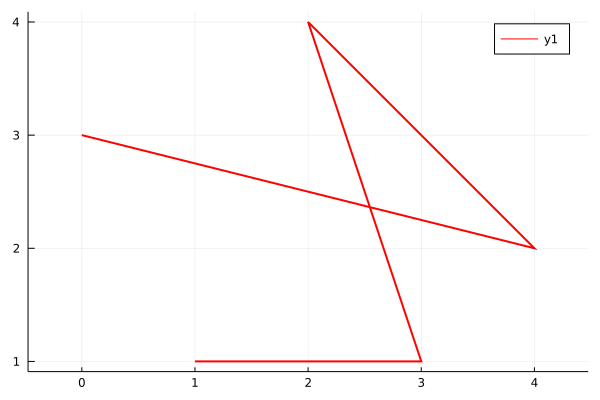

In [19]:
using Plots


x = [1,3,2,4,0]

y = [1,1,4,2,3]

Plots.plot(x, y, aspect_ratio=:equal, grid=true, linewidth=2, linecolor=:red)



### Problem 6

Plot the functions $f(x) = x$, $g(x) = 1/(1+x^3)$, $h(x) = e^{-x}$ and $z(x) = e^{-x^2}$ over the interval $x\in [0, 3]$. Describe your plots by using the functions `xlabel`, `ylabel`, `title` and `legend`.

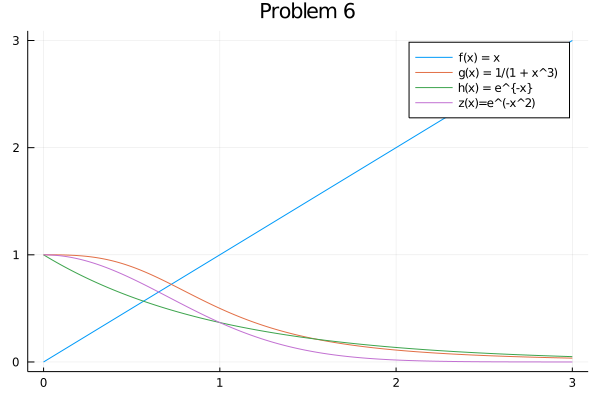

In [20]:
x = 0:.0001:3;

f(x) = x;
g(x) = 1/(1+x^3);
h(x) = exp(-x);
zp(x) = exp(-x^2);

data = [f.(x) g.(x) h.(x) zp.(x)];

labels = ["f(x) = x" "g(x) = 1/(1 + x^3)" "h(x) = e^{-x}" "z(x)=e^(-x^2)"];

Plots.plot(x, data, label = labels, title = "Problem 6", grid=true)

### Problem 7

(Project Euler, Problem 25)

> The Fibonacci sequence is defined by the recurrence relation:
> 
> Fn = Fn−1 + Fn−2, where F1 = 1 and F2 = 1.
>
> Hence the first 12 terms will be:
> 
> F1 = 1
> F2 = 1
> F3 = 2
> F4 = 3
> F5 = 5
> F6 = 8
> F7 = 13
> F8 = 21
> F9 = 34
> F10 = 55
> F11 = 89
> F12 = 144
>
> The 12th term, F12, is the first term to contain three digits.
> 
> What is the index of the first term in the Fibonacci sequence to contain 1000 digits?

To solve this problem, we need to compute with integers much larger than the built-in type `Int128`. While Julia has support for larger integers, here you will write your own implementation to solve this problem using arrays and basic arithmetics.

We will represent the large integers by an array of length $n$ with integers between $0\ldots 9$. This is certainly not the most efficient way to solve this problem, but it works. More precisely, the value of a large integer represented by an array $X$ is
$$
\sum_{k=1}^n X[k] \cdot 10^{k-1}
$$
For example, with $n=5$ the array $X = [7,2,4,3,0]$ represents the integer $x=3427$.

We can define a helper function to print integers represented like this:

In [21]:
function print_bigint(X)
    for i = length(X):-1:1
        print(X[i])
    end
    
    println()
end

print_bigint (generic function with 1 method)

### Problem 7(a)

Write a function `int_to_bigint(x,n)` which converts a regular integer `x` (e.g. of type `Int64`) to an array of length `n` as described above. For example,
```julia
X = int_to_bigint(34278273,10);
println(X)
print_bigint(X)
```
should output
```
[3, 7, 2, 8, 7, 2, 4, 3, 0, 0]
0034278273
```

In [22]:
function int_to_bigint(x,n)
    
    arr = zeros(Int64,n)
    i = 1
    
    while true
            
        if i == n
            break
        end
        
        arr[i] = floor(x % 10)
        x /= 10
        i += 1
        
    end
    
    return arr
    
end


X = int_to_bigint(34278273,10);
println(X)
print_bigint(X)

[3, 7, 2, 8, 7, 2, 4, 3, 0, 0]
0034278273


### Problem 7(b)

To solve the original problem, we also need a function to add two large integers represented by arrays. Implement a function `add_bigints(X,Y)` which computes the sum of the two numbers, and returns it in a new array. Use the standard addition with carry algorithm, and if there is a carry beyond the $n$th digit your code should run `error("Overflow")`.

For example, the code
```julia
x = 637465
y = 99827391
z = x + y
X = int_to_bigint(x,10)
Y = int_to_bigint(y,10)
Z = add_bigints(X,Y)
print_bigint(Z)
println(z)
```
should produce the output
```
0100464856
100464856
```
but if you change x to `9999999999` it should stop with an error.

In [23]:
function add_bigints(X,Y)
    
    n = max(length(X),length(Y))
    max_of_X = count(i->(i == 9),X)
    max_of_Y = count(i->(i == 9),Y)
    result = Int64[]
    carries = 0
    
    if (max_of_X == n-1 || max_of_Y == n-1)
        error("Overflow")
    end

    for i = 1:n

        sum = (X[i] + Y[i] + carries)

        if (sum > 9) 
            sum = (sum % 10)
            carries = 1
        else 
            sum = sum 
            carries = 0 
        end

        push!(result, sum)

    end

    return result
    
end

x = 637465
y = 99827391
z = x + y
X = int_to_bigint(x,10)
Y = int_to_bigint(y,10)
#println(X)
#println(Y)
Z = add_bigints(X,Y);
print_bigint(Z)
println(z)


0100464856
100464856


### Problem 7(c)

Finally we can solve the original Fibonacci problem. Write a function `big_fibonacci(n)` which finds the first term in the sequence to contain `n` digits, prints that number (using `print_bigint`) and returns the index.

Try your function on the original problem, that is, run `big_fibonacci(1000)`.

In [24]:
function big_fibonacci(n)
    
    bigIntFibonacci = int_to_bigint(1,n+1)
    bigIntPreviousFibonacci = int_to_bigint(1,n+1)
    iteration = 2
    
    
    while true
        
        iteration += 1
        
        newFibonacci = add_bigints(bigIntFibonacci, bigIntPreviousFibonacci)
        
        arr = newFibonacci[end:-1:1]
        first_nonzero = 0
        
        for i = 1:length(arr)
            
            if arr[i] != 0
                first_nonzero = i
                break
            end
            
        end
        
        if length(arr[first_nonzero:end]) >= n
            
            print_bigint(newFibonacci)
            return iteration
            
        end
        

        bigIntPreviousFibonacci = bigIntFibonacci
        bigIntFibonacci = newFibonacci
        
    end 
    
end



big_fibonacci (generic function with 1 method)

In [25]:
a = big_fibonacci(1000)

0107006626638275893676498058445739688508368389663215166501323520337531452060469404062188914758248979265780469488817759195748433646667256995951299603046126274809248218614406943305123477444275027378175308757939166619214925918675955396642283714894311307469950343954700198543260972306729019287052644724372611771582182554849112052501320147861296593138179223555965745203950613755146783754322911960212993404826070617539770684706820289548690266618543512452190036948064135744747091170761976694569107009802439343961747410373691250323136553216477369702316775505159517351846057995491941096777837322966579658164651390348815425631018422419025984608800011018625555024549393711365165703944762958471454852342595042858242530608354443542821261100899286379504800689433030977321783486454311320576565986845628861680871869383529735064398629764066000072356291790520705116407761481249188583094594056668833910935094445657635766615161931775379289166158132715961687748798382182049252034847387438473677193451278702921863625062781

4782